<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 206 non-null    int64  
 1   time                  206 non-null    float64
 2   train/box_loss        206 non-null    float64
 3   train/cls_loss        206 non-null    float64
 4   train/dfl_loss        206 non-null    float64
 5   metrics/precision(B)  206 non-null    float64
 6   metrics/recall(B)     206 non-null    float64
 7   metrics/mAP50(B)      206 non-null    float64
 8   metrics/mAP50-95(B)   206 non-null    float64
 9   val/box_loss          206 non-null    float64
 10  val/cls_loss          206 non-null    float64
 11  val/dfl_loss          206 non-null    float64
 12  lr/pg0                206 non-null    float64
 13  lr/pg1                206 non-null    float64
 14  lr/pg2                206 non-null    float64
dtypes: float64(14), int64(1

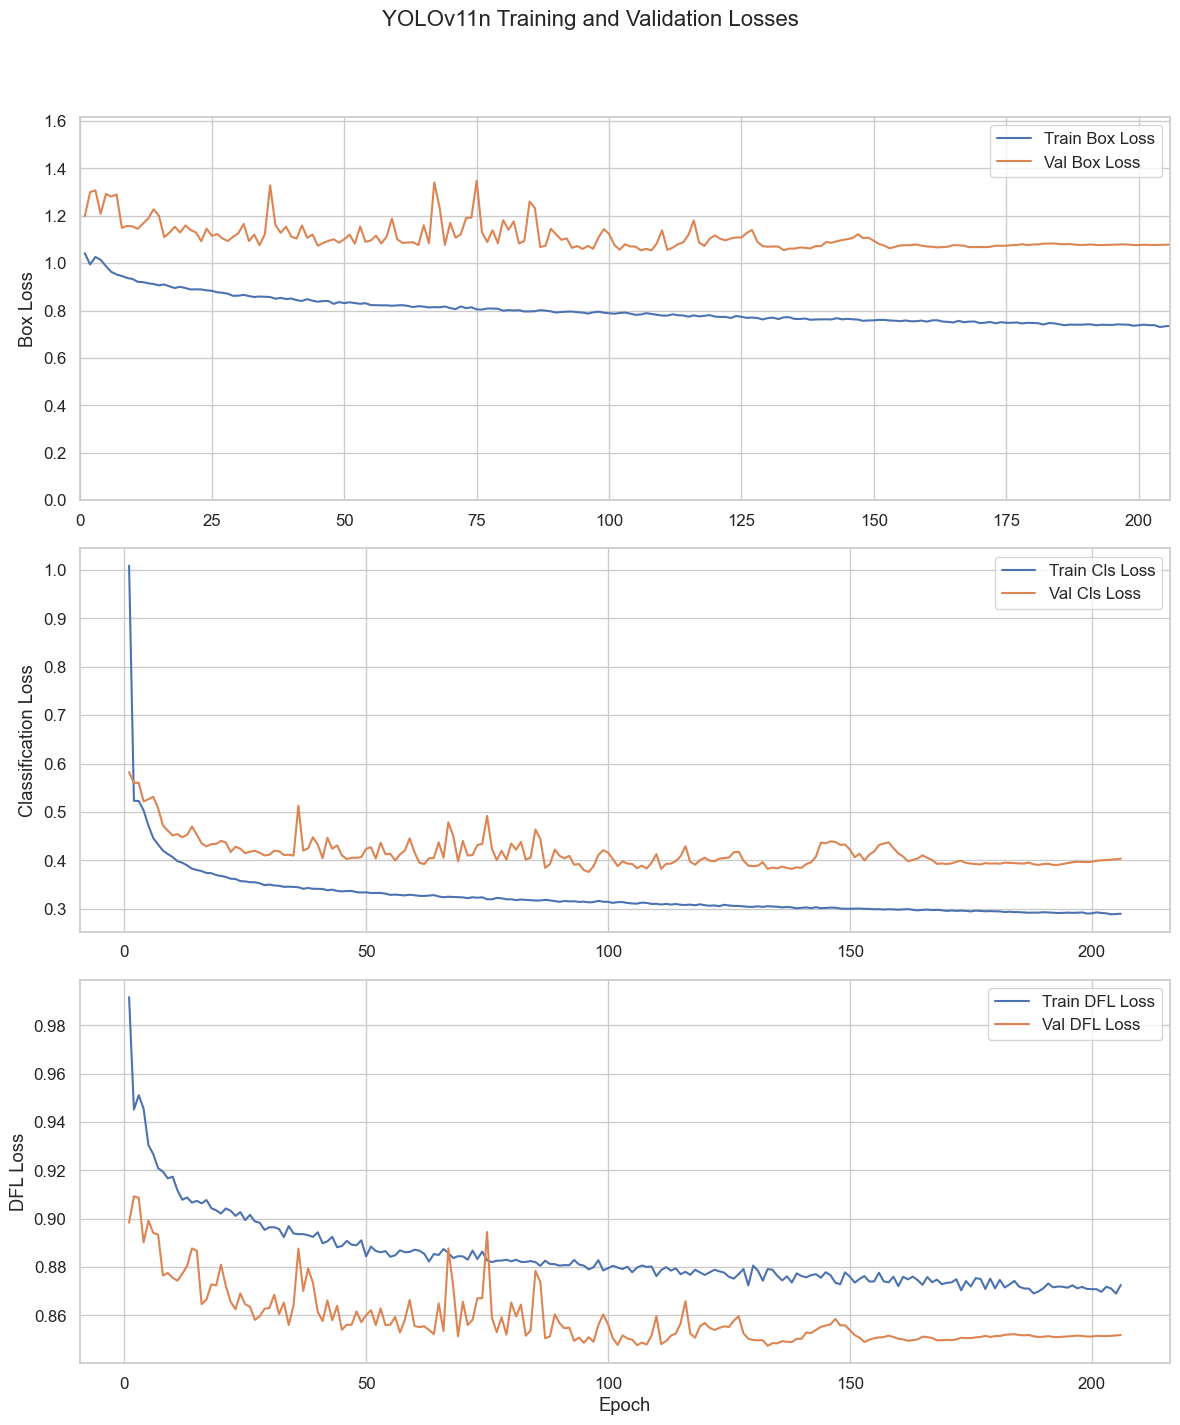

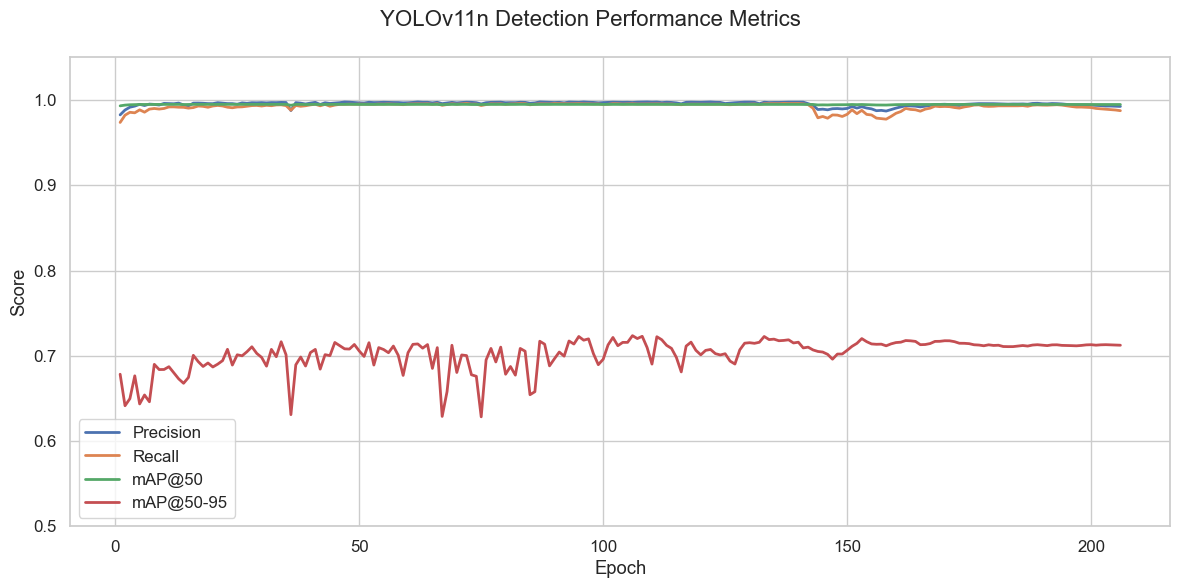

{'Epoch': 106,
 'Precision': 0.99712,
 'Recall': 0.99562,
 'mAP@50': 0.99493,
 'mAP@50-95': 0.72358,
 'Val Box Loss': 1.05411,
 'Val Cls Loss': 0.384,
 'Val DFL Loss': 0.84774}

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'Train2_results.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows to understand the structure
df.info(), df.head()


import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('YOLOv11n Training and Validation Losses', fontsize=16)

# Plot losses
axes[0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
axes[0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0].set_ylabel('Box Loss')
axes[0].legend()

# Dynamically extend y-axis scale
max_loss = max(df['train/box_loss'].max(), df['val/box_loss'].max())
axes[0].set_ylim(0, max_loss * 1.2)  # Extend 20% above the maximum loss

# Optionally adjust x-axis to match epochs
axes[0].set_xlim(0, df['epoch'].max())


axes[1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
axes[1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
axes[1].set_ylabel('Classification Loss')
axes[1].legend()

axes[2].plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
axes[2].plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
axes[2].set_ylabel('DFL Loss')
axes[2].set_xlabel('Epoch')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Precision, Recall, and mAP over Epochs
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('YOLOv11n Detection Performance Metrics', fontsize=16)

ax.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', linewidth=2)
ax.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_ylim(0.5, 1.05)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the best epoch based on highest mAP@50-95
best_epoch_idx = df['metrics/mAP50-95(B)'].idxmax()
best_epoch_data = df.loc[best_epoch_idx]

# Extract key values
best_epoch = int(best_epoch_data['epoch'])
best_metrics = {
    'Epoch': best_epoch,
    'Precision': best_epoch_data['metrics/precision(B)'],
    'Recall': best_epoch_data['metrics/recall(B)'],
    'mAP@50': best_epoch_data['metrics/mAP50(B)'],
    'mAP@50-95': best_epoch_data['metrics/mAP50-95(B)'],
    'Val Box Loss': best_epoch_data['val/box_loss'],
    'Val Cls Loss': best_epoch_data['val/cls_loss'],
    'Val DFL Loss': best_epoch_data['val/dfl_loss']
}

best_metrics